<a href="https://colab.research.google.com/github/Atharva-Peshkar/DeepFake-Detector/blob/main/DeepFake_2_(Face_Extraction).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mtcnn

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/My Drive/Colab Notebooks/DeepFake/

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive/My Drive/Colab Notebooks/DeepFake


In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
from tqdm.notebook import tqdm
import time
import os
from google.colab.patches import cv2_imshow

In [ ]:
main_dir = '/gdrive/My Drive/Colab Notebooks/DeepFake/'

In [ ]:
'''This is the function for extracting the faces from frames.
The detect_mtcnn function, is the primary function that uses MTCNN as a detector to detect, extract and append the face to a list faces which it returns.
The face_extractor function takes the directories where the frames are stored and the directory where the images are to be stored. 
It calls the detect_mtcnn function.

The directory structure should be as follows:

+ DeepFake                      |       +DeepFake
  + Real                        |         +Fake
    +RealFrames (img_dir)       |           +FakeFrames (img_dir)
                                |            
'''

from mtcnn import MTCNN
detector = MTCNN()

def detect_mtcnn(detector, images, size):      #detecting faces
    faces = []
    for image in tqdm(images):                      #tqdm for progressbar
        boxes = detector.detect_faces(image)        #get the dictionary of coordinates
        box = boxes[0]['box']   
        face = image[box[1]:box[3]+box[1], box[0]:box[2]+box[0]]      #cropping the face
        faces.append(cv2.resize(face, size))                    #resizing the face and adding it to the list
    return faces

def face_extractor(img_dir,dest_dir):
  print("\n ******    Welcome to Face Extractor     ******        \n\n    Progress: ") 
  img = [cv2.imread(os.path.join(img_dir,file)) for file in os.listdir(img_dir)[0:5] if file.endswith('jpg')]   #reading images that end with .jpg or .png
  extracted_faces = detect_mtcnn(detector,img,(150,150))  #calling detect_mtcnn function

  count = 0

  for ex_face in extracted_faces:
    count = count+1
    cv2.imwrite(os.path.join(dest_dir,f'frame{count}.jpg'),ex_face)  #writing image to destination folder
    print(f"Face from image {count} extracted and saved!")
  return extracted_faces

In [ ]:
bdir = os.path.join(main_dir,'faces')
ddir = os.path.join(main_dir,'faces/ex/')
atha = face_extractor(bdir,ddir)




 ******    Welcome to Face Extractor     ******        

    Progress: 


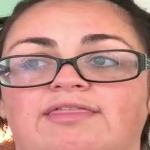

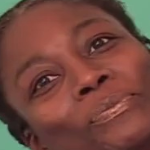

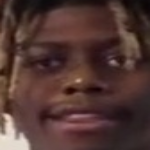

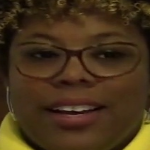

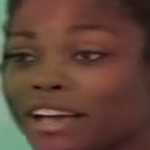

In [ ]:
for h in atha:
  cv2_imshow(h)